<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Clustering_WPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

In [6]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

In [7]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [8]:
df=df.dropna()

In [9]:
df.shape

(485, 15)

In [10]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [12]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (436, 15)
Unseen Data For Predictions: (49, 15)


In [13]:
from pycaret.clustering import *

exp_clu = setup(data, normalize = True,session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(436, 15)"
2,Missing Values,False
3,Numeric Features,15
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(436, 15)"
9,CPU Jobs,-1


In [14]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2587,164.2418,1.4106,0,0,0


In [15]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [16]:
kmodes = create_model('kmodes', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2023,3.3742,8.9191,0,0,0


In [17]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7f0c62fd93b0>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


In [18]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [19]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,Cluster
0,7.11,8.9,83.0,68.0,129.0,4.09,34.0,28.0,1.53,0.218,6.60,0.354266,4.086,0.0520,0.181383,Cluster 0
1,8.00,7.1,82.0,72.0,149.0,4.68,32.0,20.0,1.66,0.194,7.54,0.514000,3.980,0.0384,0.228262,Cluster 0
2,7.55,7.2,73.0,46.0,115.0,4.75,24.0,20.0,1.01,0.205,6.70,0.371003,2.640,0.1340,0.252384,Cluster 0
3,8.20,7.3,250.0,88.0,402.0,15.41,120.0,44.0,5.31,1.420,23.48,0.540000,81.930,0.1460,0.540955,Cluster 1
4,8.10,8.1,82.0,50.0,132.0,5.96,40.0,20.0,2.55,0.205,10.60,0.700165,7.326,0.0350,0.225141,Cluster 0


In [20]:
plot_model(kmeans)

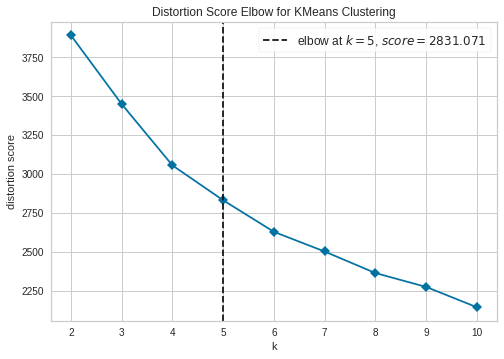

In [21]:
plot_model(kmeans, plot = 'elbow')

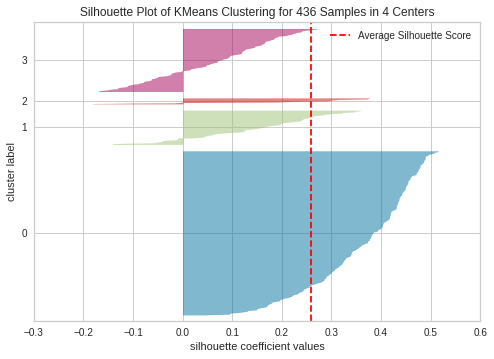

In [22]:
plot_model(kmeans, plot = 'silhouette')

In [23]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [25]:
plot_model(kmeans, plot = 'distribution', feature = 'WPI')

In [26]:
plot_model(kmeans, plot = 'distribution', feature = 'DO')

In [27]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,Cluster
0,8.40,7.40,103.0,52.0,168.0,5.88,40.0,24.0,3.04,0.319,8.29,0.506000,12.810,0.106,0.308627,Cluster 0
1,8.10,8.70,102.0,56.0,179.0,7.11,40.0,16.0,2.36,0.370,10.76,0.339000,10.440,0.234,0.380511,Cluster 0
2,7.30,8.19,98.0,44.0,169.0,7.07,34.0,18.0,2.47,0.380,10.76,0.373000,16.790,0.038,0.197155,Cluster 0
3,7.90,7.20,80.0,56.0,142.0,4.49,38.0,14.0,2.80,0.466,6.84,0.233000,4.100,0.065,0.253932,Cluster 0
4,7.31,7.80,132.0,44.0,201.0,22.15,50.0,42.0,2.86,0.421,35.70,0.888655,14.193,0.089,0.274732,Cluster 3


In [28]:
save_model(kmeans,'Final KMeans Model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [29]:
saved_kmeans = load_model('Final KMeans Model')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [31]:
new_prediction.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,Cluster
0,8.40,7.40,103.0,52.0,168.0,5.88,40.0,24.0,3.04,0.319,8.29,0.506000,12.810,0.106,0.308627,Cluster 0
1,8.10,8.70,102.0,56.0,179.0,7.11,40.0,16.0,2.36,0.370,10.76,0.339000,10.440,0.234,0.380511,Cluster 0
2,7.30,8.19,98.0,44.0,169.0,7.07,34.0,18.0,2.47,0.380,10.76,0.373000,16.790,0.038,0.197155,Cluster 0
3,7.90,7.20,80.0,56.0,142.0,4.49,38.0,14.0,2.80,0.466,6.84,0.233000,4.100,0.065,0.253932,Cluster 0
4,7.31,7.80,132.0,44.0,201.0,22.15,50.0,42.0,2.86,0.421,35.70,0.888655,14.193,0.089,0.274732,Cluster 3
